In [3011]:
#Personal Medical Cost Prediction
#Group_27
#Minhaj MHA- EG/2020/4076
#Morais MNS - EG/2020/4077


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics 
from sklearn.metrics import mean_squared_error



## Data Collection & Analysis

In [3012]:
# loading the data from csv file to a Pandas DataFrame
insuarance_dataset = pd.read_csv('./insurance.csv')

In [3013]:
# First 5 rows of the dataframe
insuarance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3014]:
# Last 5 rows of the dataframe
insuarance_dataset.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [3015]:
# number of rows and columns
insuarance_dataset.shape

(1338, 7)

Getting Outliers

In [3016]:
# We noticed that there are some outliers in the charges column. so we need to get rid of them.
upper_limit = insuarance_dataset['charges'].mean() + 3 * insuarance_dataset['charges'].std()

print(upper_limit)

49600.45597522324


In [3017]:
lower_limit = insuarance_dataset['charges'].mean() - 3 * insuarance_dataset['charges'].std()

print(lower_limit)

-23059.611444940725


In [3018]:
# Since it is negative,by only using upper limit only
insuarance_dataset[(insuarance_dataset.charges > upper_limit) | (insuarance_dataset.charges < lower_limit)]

,age,sex,bmi,children,smoker,region,charges
34,28,male,36.400,1,yes,southwest,51194.55914
543,54,female,47.410,0,yes,southeast,63770.42801
577,31,female,38.095,1,yes,northeast,58571.07448
819,33,female,35.530,0,yes,northwest,55135.40209
1146,60,male,32.800,0,yes,southwest,52590.82939
1230,52,male,34.485,3,yes,northwest,60021.39897
1300,45,male,30.360,0,yes,southeast,62592.87309


In [3019]:
insuarance_dataset = insuarance_dataset[insuarance_dataset.charges < upper_limit]

In [3020]:
insuarance_dataset.charges.max()

49577.6624

In [3021]:
# Getting some information about the dataset
insuarance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1331 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1331 non-null   int64  
 1   sex       1331 non-null   object 
 2   bmi       1331 non-null   float64
 3   children  1331 non-null   int64  
 4   smoker    1331 non-null   object 
 5   region    1331 non-null   object 
 6   charges   1331 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.2+ KB


In [3022]:
# Checking for missing values
insuarance_dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Droping duplicate values

In [3023]:
insuarance_dataset.duplicated().sum()

1

In [3024]:
#Delete this duplicate
insuarance_dataset.drop_duplicates(inplace=True)

## Exploratory Data Analysis

In [3025]:
# Statistical Measures of the dataset
insuarance_dataset.describe()

,age,bmi,children,charges
count,1330.000000,1330.000000,1330.000000,1330.000000
mean,39.200752,30.633049,1.097744,13045.345009
std,14.052396,6.091072,1.206108,11699.581595
min,18.000000,15.960000,0.000000,1121.873900
25%,26.250000,26.220000,0.000000,4724.369462
50%,39.000000,30.302500,1.000000,9303.297725
75%,51.000000,34.600000,2.000000,16389.832412
max,64.000000,53.130000,5.000000,49577.662400


c:\Users\nirasha\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\nirasha\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\nirasha\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\nirasha\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is

c:\Users\nirasha\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\nirasha\Anaconda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\nirasha\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\nirasha\Anaconda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with

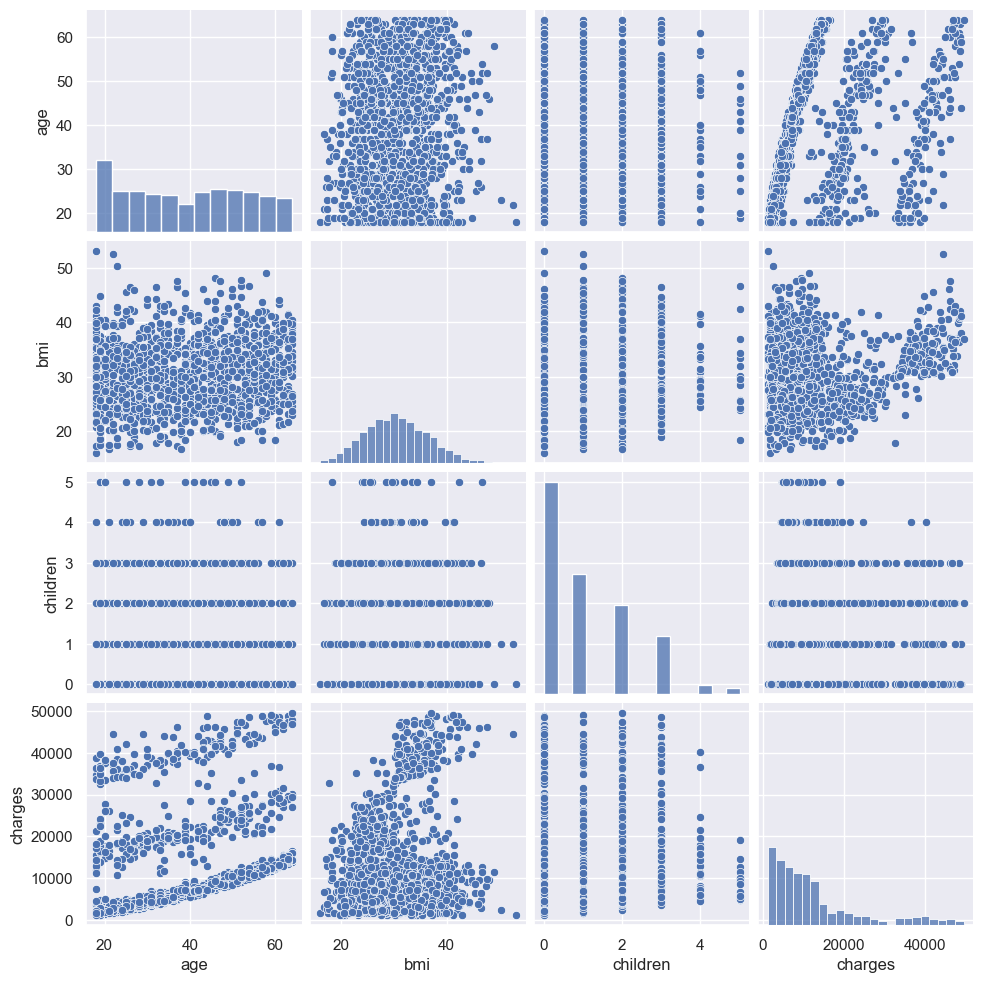

In [3026]:
sns.pairplot(insuarance_dataset)

For every 7 features, distributions are given below

Age Distribution

C:\Users\nirasha\AppData\Local\Temp\ipykernel_12572\2064484943.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insuarance_dataset['age'],)
c:\Users\nirasha\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\nirasha\Anaconda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_

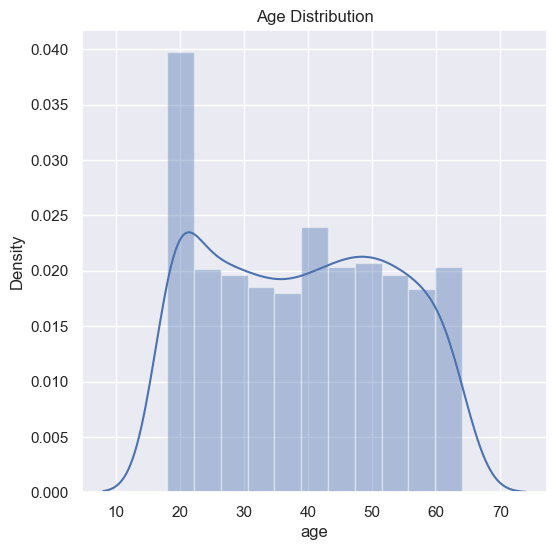

In [3027]:
# Distribution of age values
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insuarance_dataset['age'],)
plt.title('Age Distribution')
plt.show()

Sex Distribution

c:\Users\nirasha\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\nirasha\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\nirasha\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


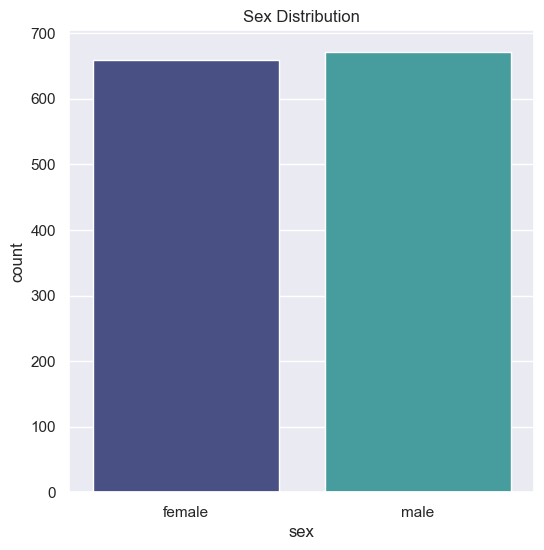

In [3028]:
# Gender column
plt.figure(figsize=(6,6))
sns.countplot(x='sex',data = insuarance_dataset,palette='mako')
plt.title('Sex Distribution')
plt.show()

In [3029]:
insuarance_dataset['sex'].value_counts()

sex
male      671
female    659
Name: count, dtype: int64

BMI Distribution

C:\Users\nirasha\AppData\Local\Temp\ipykernel_12572\2059011333.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insuarance_dataset['bmi'])
c:\Users\nirasha\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\nirasha\Anaconda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_i

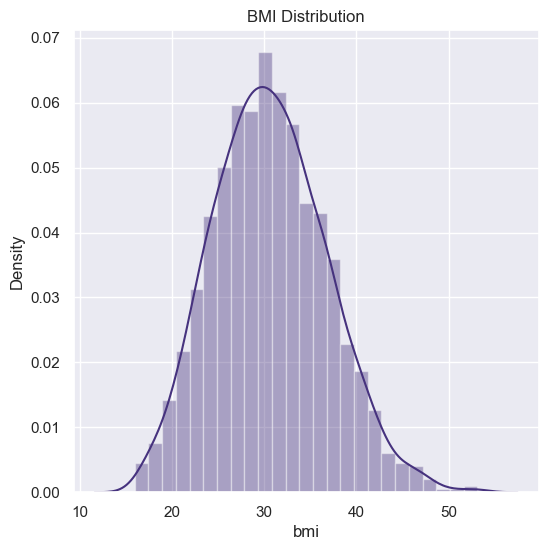

In [3030]:
#bmi Distribution
plt.figure(figsize=(6,6))
sns.set_palette("viridis")
sns.distplot(insuarance_dataset['bmi'])
plt.title('BMI Distribution')
plt.show()

Normal BMI Range --> 18.5 to 24.9

Children Distribution

c:\Users\nirasha\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\nirasha\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\nirasha\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


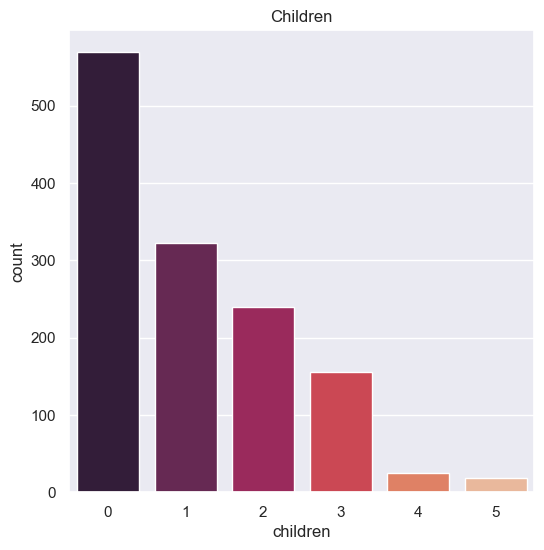

In [3031]:
# Children column
plt.figure(figsize=(6,6))
sns.countplot(x='children', data=insuarance_dataset, palette='rocket')
plt.title('Children')
plt.show()

c:\Users\nirasha\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\nirasha\Anaconda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


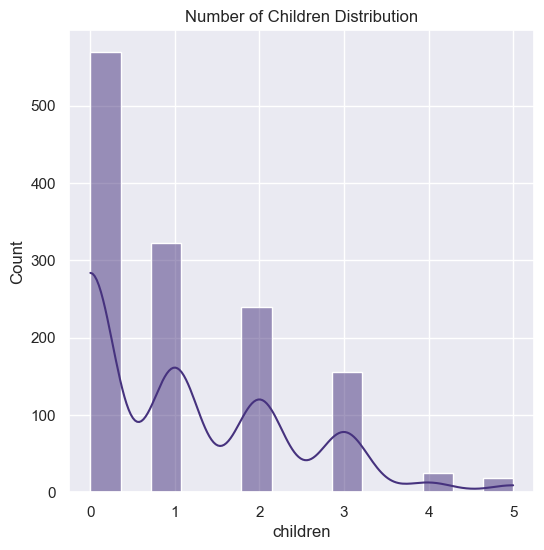

In [3032]:
plt.figure(figsize=(6, 6))
sns.histplot(data=insuarance_dataset, x='children', kde=True, )
plt.title('Number of Children Distribution')
plt.show()

In [3033]:
insuarance_dataset['children'].value_counts()

children
0    569
1    322
2    240
3    156
4     25
5     18
Name: count, dtype: int64

Smoker Distribution

c:\Users\nirasha\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\nirasha\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\nirasha\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


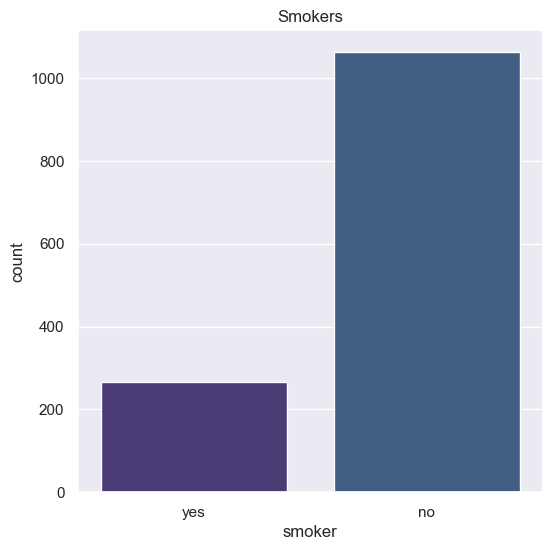

In [3034]:
# Smoker column
plt.figure(figsize=(6,6))
sns.countplot(x='smoker',data=insuarance_dataset)
plt.title('Smokers')
plt.show()

In [3035]:
insuarance_dataset['smoker'].value_counts()

smoker
no     1063
yes     267
Name: count, dtype: int64

Region Distribution

c:\Users\nirasha\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\nirasha\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\nirasha\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


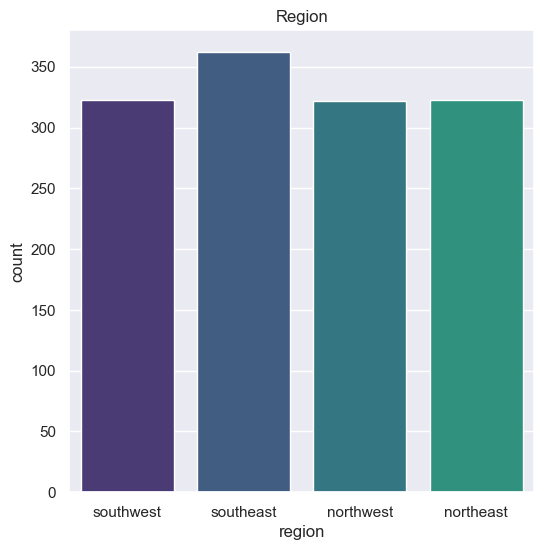

In [3036]:
# Region column
plt.figure(figsize=(6,6))
sns.countplot(x='region',data=insuarance_dataset)
plt.title('Region')
plt.show()

In [3037]:
insuarance_dataset['region'].value_counts()

region
southeast    362
southwest    323
northeast    323
northwest    322
Name: count, dtype: int64

Charge Distribution

C:\Users\nirasha\AppData\Local\Temp\ipykernel_12572\407409850.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insuarance_dataset['charges'])
c:\Users\nirasha\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\nirasha\Anaconda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.us

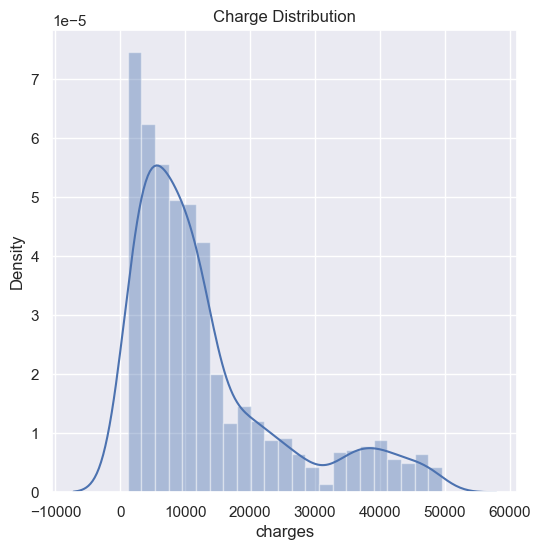

In [3038]:
# Distribution of charges values
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insuarance_dataset['charges'])
plt.title('Charge Distribution')
plt.show()

As in the above figure, the distribution is right-skewed.To make it a normal approximation,by applying natural log

C:\Users\nirasha\AppData\Local\Temp\ipykernel_12572\3241690971.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(np.log10(insuarance_dataset['charges']), kde = True, color = 'r' )
c:\Users\nirasha\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\nirasha\Anaconda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating 

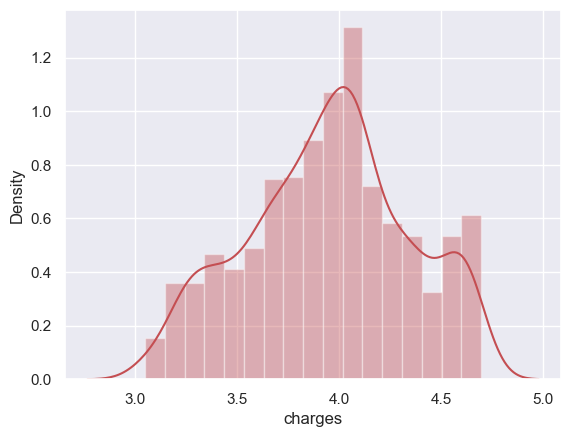

In [3039]:
ax = sns.distplot(np.log10(insuarance_dataset['charges']), kde = True, color = 'r' )

### Relation between each categorical column and charges column using Box plots



In [3040]:
# list each of Categorical and Numerical columns
categorical_columns = insuarance_dataset.select_dtypes(include=object).columns.tolist()
numerical_columns = insuarance_dataset.select_dtypes(exclude=object).columns.tolist()

c:\Users\nirasha\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\nirasha\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\nirasha\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


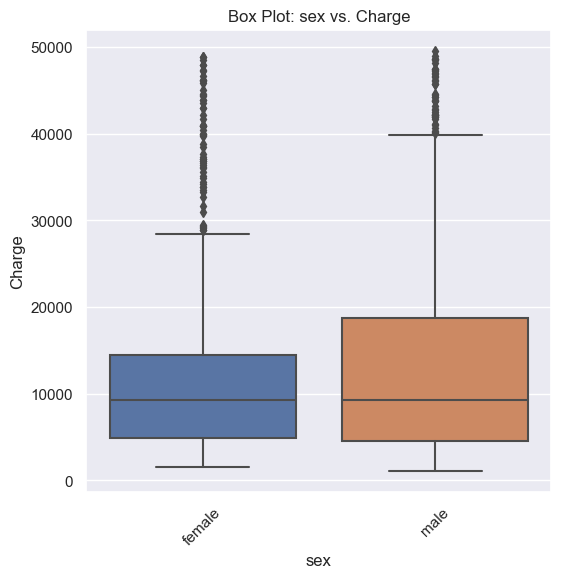

c:\Users\nirasha\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\nirasha\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\nirasha\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


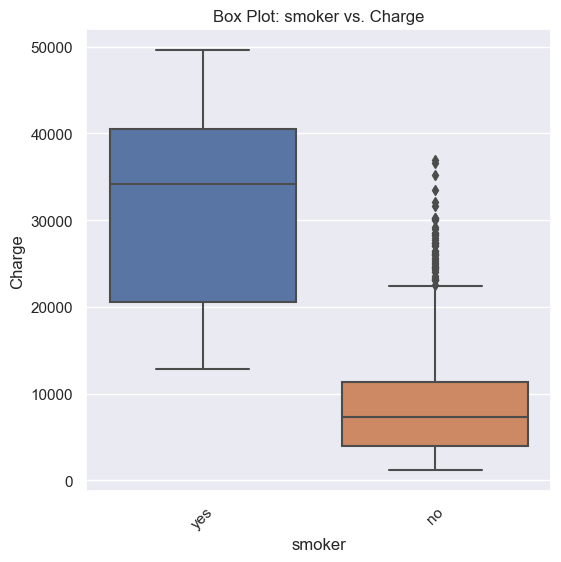

c:\Users\nirasha\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\nirasha\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\nirasha\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


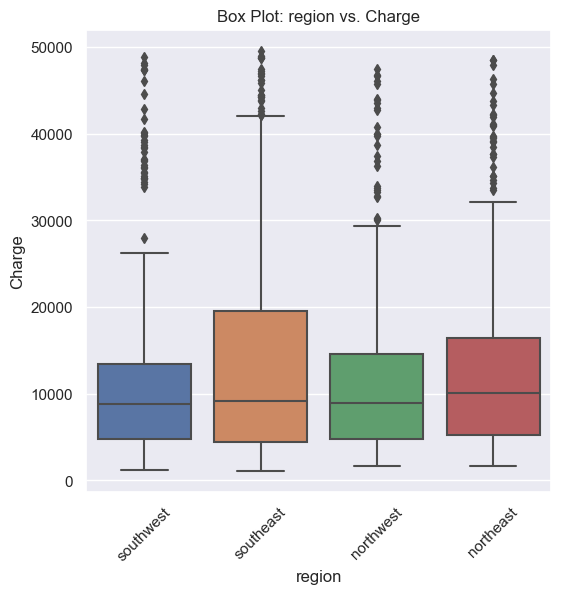

In [3041]:
# Create box plots for each categorical column
for column in categorical_columns:
    plt.figure(figsize=(6, 6))
    sns.boxplot(x=column, y='charges', data=insuarance_dataset)
    plt.title(f'Box Plot: {column} vs. Charge')
    plt.xlabel(column)
    plt.ylabel('Charge')
    plt.xticks(rotation=45)
    plt.show()

### Relationship Between Some Features And Charge

Now let's look at the charges by region

In [3042]:
charges = insuarance_dataset['charges'].groupby(insuarance_dataset['region']).sum().sort_values(ascending = True)
charges = charges.head()

c:\Users\nirasha\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\nirasha\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\nirasha\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='region', ylabel='charges'>

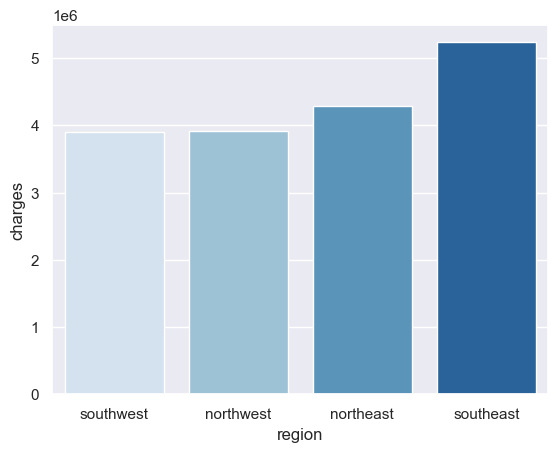

In [3043]:
sns.barplot(x=charges.index, y=charges, palette='Blues')

So overall the highest medical charges can be seen in the Southeast and the lowest can be seen in the Southwest. Taking into account certain factors (sex, smoking, having children) let's see how it changes by region

c:\Users\nirasha\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\nirasha\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\nirasha\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\nirasha\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is

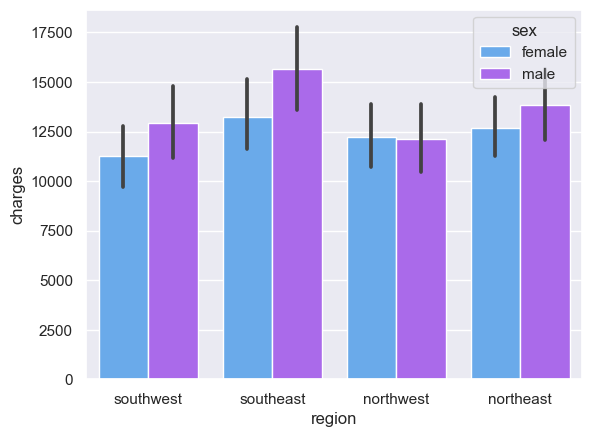

In [3044]:
ax = sns.barplot(x='region', y='charges', hue='sex', data=insuarance_dataset, palette='cool')

c:\Users\nirasha\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\nirasha\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\nirasha\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\nirasha\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is

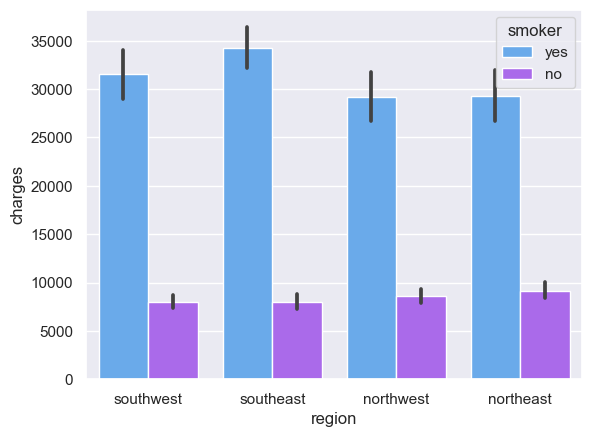

In [3045]:
ax = sns.barplot(x='region', y='charges', hue='smoker', data=insuarance_dataset, palette='cool')

c:\Users\nirasha\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\nirasha\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\nirasha\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\nirasha\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is

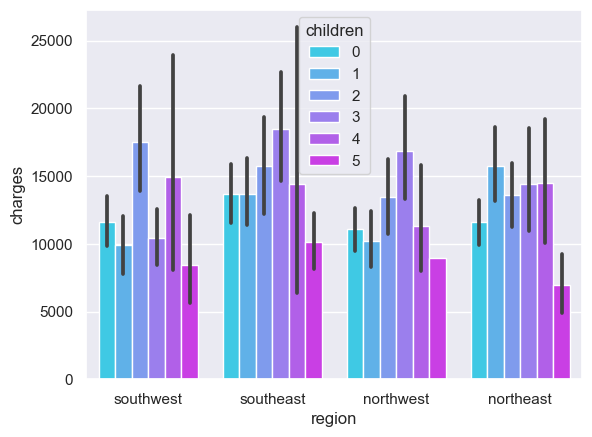

In [3046]:
ax = sns.barplot(x='region', y='charges', hue='children', data=insuarance_dataset, palette='cool')

Relationship between smoker count and gender

c:\Users\nirasha\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\nirasha\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\nirasha\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\nirasha\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is

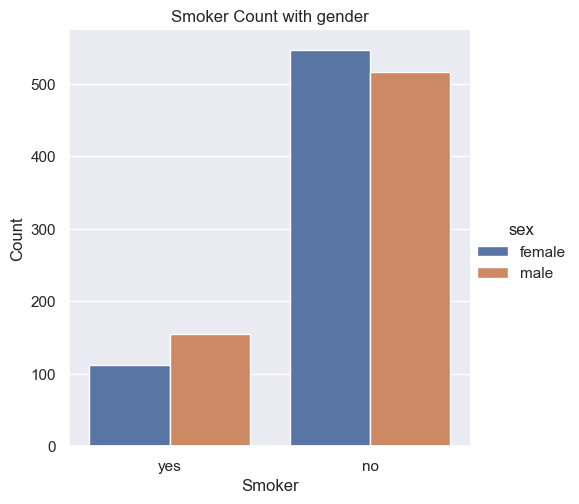

In [3047]:
sns.catplot(x="smoker", kind="count",hue = 'sex', data=insuarance_dataset)
plt.title('Smoker Count with gender')
plt.xlabel('Smoker')
plt.ylabel('Count')
plt.show()

As in the above figure, it is crystal clear, there are male smokers than female smokers.Therefore,we can assume that medical treatment for males would be more than females,impact of smoking on the medical expenses

c:\Users\nirasha\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\nirasha\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\nirasha\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='sex', ylabel='charges'>

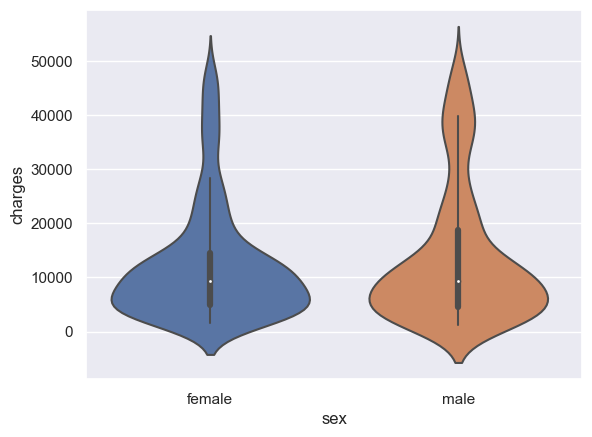

In [3048]:
sns.violinplot(x = 'sex', y = 'charges', data = insuarance_dataset)

c:\Users\nirasha\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\nirasha\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\nirasha\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: title={'center': 'Box plot for charges of women'}, xlabel='charges', ylabel='smoker'>

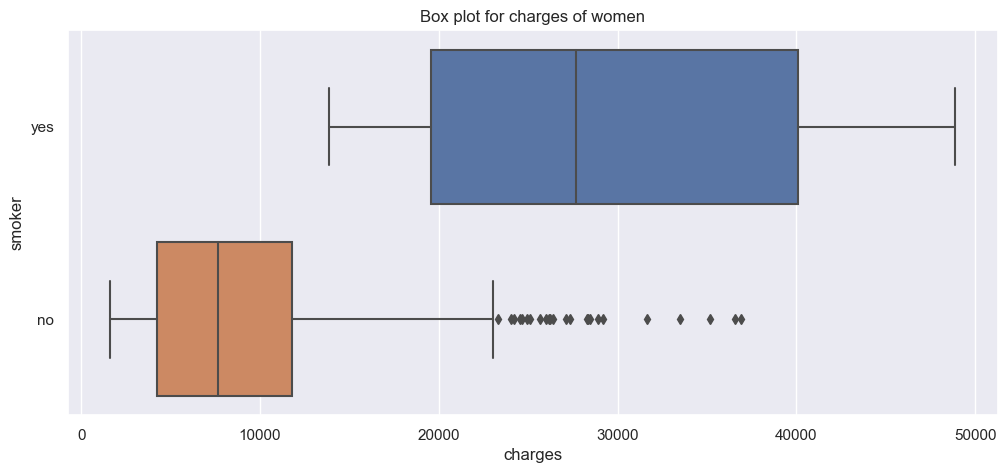

In [3049]:
plt.figure(figsize=(12,5))
plt.title("Box plot for charges of women")
sns.boxplot(y="smoker", x="charges", data =  insuarance_dataset[(insuarance_dataset.sex == 'female')] , orient="h")


c:\Users\nirasha\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\nirasha\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\nirasha\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: title={'center': 'Box plot for charges of men'}, xlabel='charges', ylabel='smoker'>

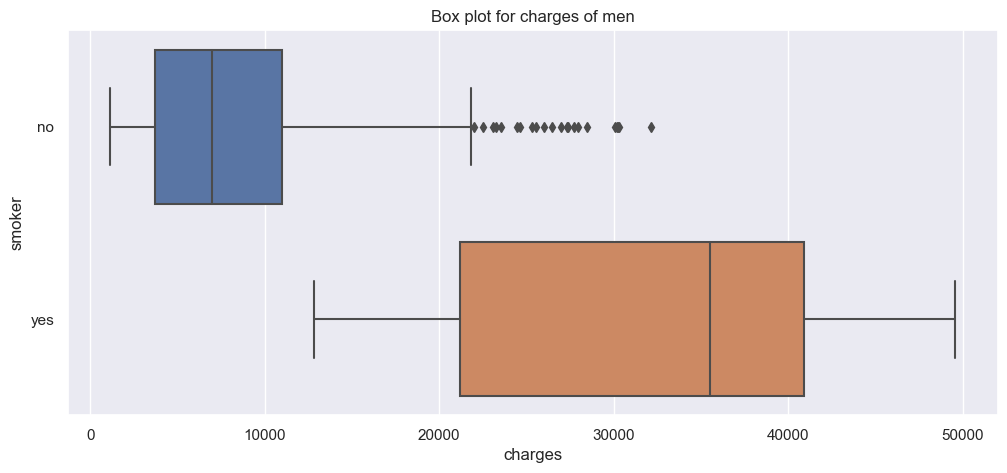

In [3050]:
plt.figure(figsize=(12,5))
plt.title("Box plot for charges of men")
sns.boxplot(y="smoker", x="charges", data =  insuarance_dataset[(insuarance_dataset.sex == 'male')] , orient="h")

c:\Users\nirasha\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\nirasha\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\nirasha\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\nirasha\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is

c:\Users\nirasha\Anaconda\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 7.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


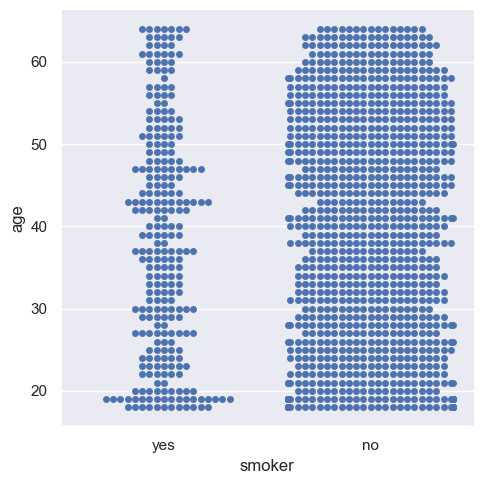

In [3051]:
#smokers and age distribution
sns.catplot(x="smoker", y="age", kind="swarm", data=insuarance_dataset)

From the graph, we can see that there are significant number of smokers of age 19. Afterwards,medical expenses of smokers of age 19 is decsribed as follows.

c:\Users\nirasha\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\nirasha\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\nirasha\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


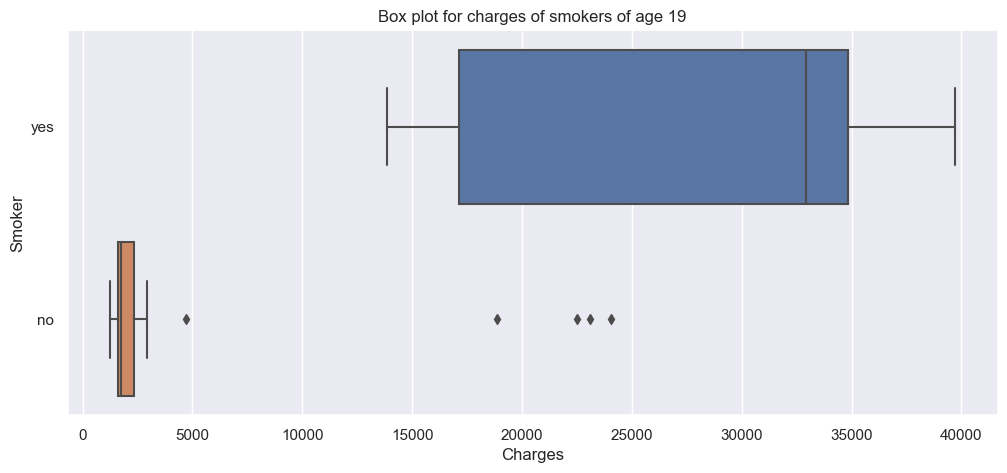

In [3052]:
#smokers of age 19
plt.figure(figsize=(12,5))
plt.title("Box plot for charges of smokers of age 19")
sns.boxplot(y="smoker", x="charges", data =  insuarance_dataset[(insuarance_dataset.age == 19)] , orient="h")
plt.xlabel('Charges')
plt.ylabel('Smoker')
plt.show()

With respect to the above figure,it is clear,the charges of smokers ofage 19 is comparatively high.In non smokers we can see some outliners, which may be due to illness or accidents.

Charge distribution with respect to patients age of smokers and non-smokers

c:\Users\nirasha\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\nirasha\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


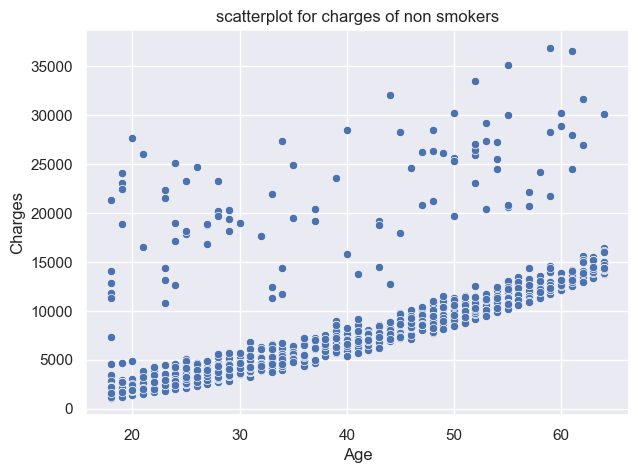

In [3053]:
#non smokers charge distribution
plt.figure(figsize=(7,5))
plt.title("scatterplot for charges of non smokers")
sns.scatterplot(x="age", y="charges", data =  insuarance_dataset[(insuarance_dataset.smoker == 'no')])
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()

c:\Users\nirasha\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\nirasha\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


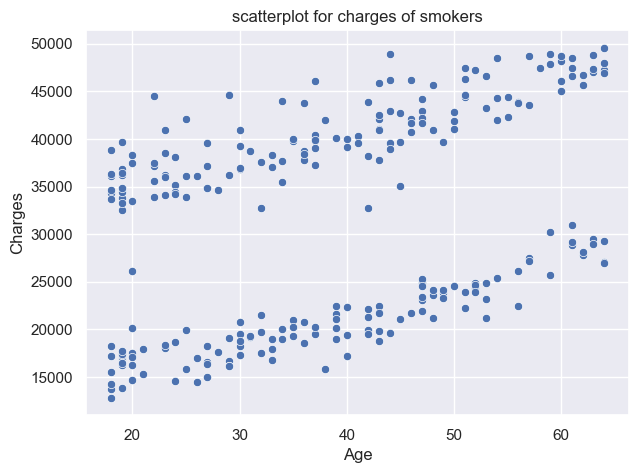

In [3054]:
#smokers charge distribution
plt.figure(figsize=(7,5))
plt.title("scatterplot for charges of smokers")
sns.scatterplot(x="age", y="charges", data =  insuarance_dataset[(insuarance_dataset.smoker == 'yes')])
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()

Pecularity can be seen in the graphs.Two sections can be highlighted. One with high medical expense which may be due to smoking related illness and the other with low medical expense which may be due age related illness.

By combining these two graphs

c:\Users\nirasha\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\nirasha\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


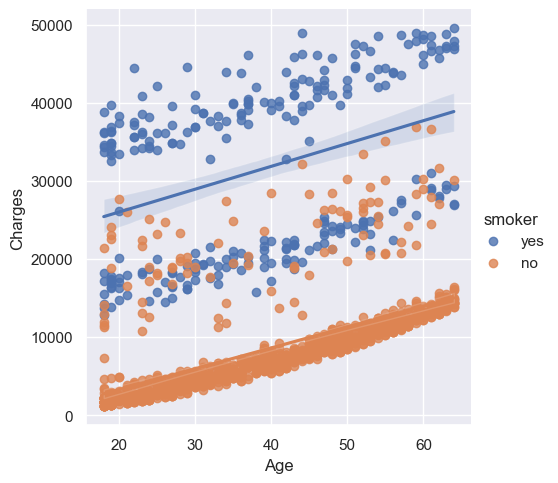

In [3055]:
#age charges distribution

sns.lmplot(x="age", y="charges", data =  insuarance_dataset, hue = 'smoker')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()

We now have a solid understanding of how costs vary based on factors like age and smoking behaviors. Smokers' medical costs are more than non-smokers'. It goes without saying that the expense of treatment rises with age in nonsmokers. However, even for younger individuals, the cost of therapy is significant for smokers, meaning that these patients are paying for both age-related illnesses and smoking-related illnesses.

Charges distribution for patients with BMI greater than 30

C:\Users\nirasha\AppData\Local\Temp\ipykernel_12572\3454036419.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insuarance_dataset[(insuarance_dataset.bmi >= 30)]['charges'])
c:\Users\nirasha\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\nirasha\Anaconda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


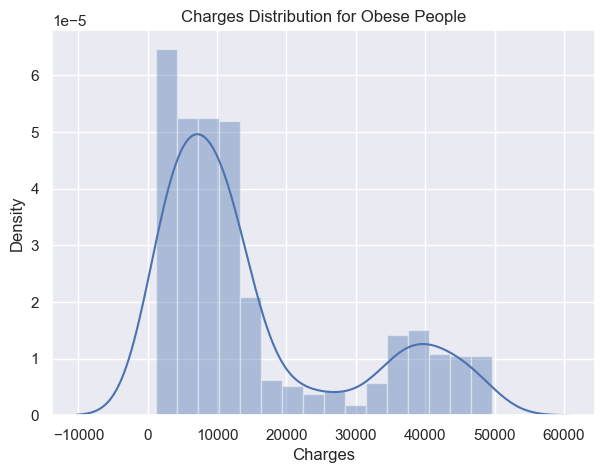

In [3056]:
#bmi charges distribution for obese people
plt.figure(figsize=(7,5))
sns.distplot(insuarance_dataset[(insuarance_dataset.bmi >= 30)]['charges'])
plt.title('Charges Distribution for Obese People')
plt.xlabel('Charges')
plt.show()

Charges distribution for patients with BMI less than 30

C:\Users\nirasha\AppData\Local\Temp\ipykernel_12572\2349483997.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insuarance_dataset[(insuarance_dataset.bmi < 30)]['charges'])
c:\Users\nirasha\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\nirasha\Anaconda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
 

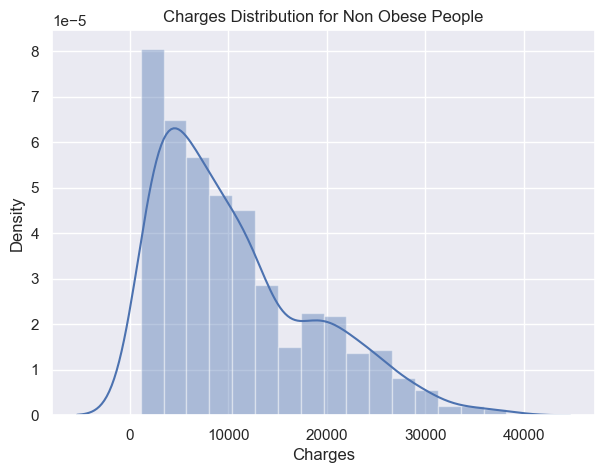

In [3057]:
plt.figure(figsize=(7,5))
sns.distplot(insuarance_dataset[(insuarance_dataset.bmi < 30)]['charges'])
plt.title('Charges Distribution for Non Obese People')
plt.xlabel('Charges')
plt.show()

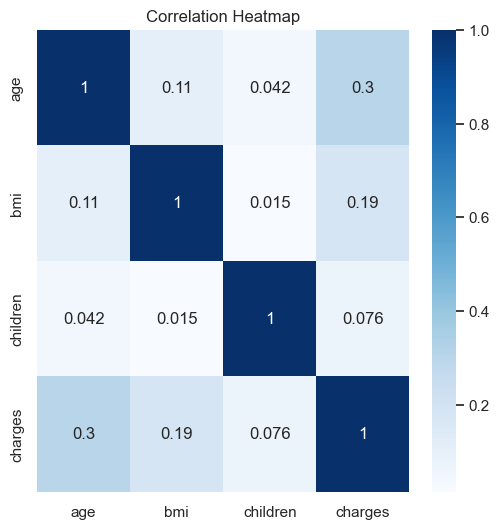

In [3058]:
correlation_matrix = insuarance_dataset[numerical_columns].corr()
plt.figure(figsize=(6, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues')
plt.title("Correlation Heatmap")
plt.show()

## Data Preprocessing

In our data set we don't have null values so we don't need to eliminate any null values

we want to encode sex, smoker and region columns. 

In [3059]:
# Encoding sex column
insuarance_dataset.replace({'sex':{'male':0,'female':1}},inplace=True)

# Encoding smoker column
insuarance_dataset.replace({'smoker':{'yes':0, 'no':1}},inplace=True)

# Encoding region column
insuarance_dataset.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}},inplace=True)

In [3060]:
# showing encoded dataset table
insuarance_dataset

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,1,3,10600.54830
1334,18,1,31.920,0,1,2,2205.98080
1335,18,1,36.850,0,1,0,1629.83350
1336,21,1,25.800,0,1,1,2007.94500


## Splitting the Features and Target

In [3061]:
# Setting inputs and output
X = insuarance_dataset.drop(columns='charges', axis=1)
Y = insuarance_dataset['charges']

In [3062]:
print(X) #Input dataset

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1330 rows x 6 columns]


In [3063]:
print(Y) #output

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1330, dtype: float64


## Splitting the data into Training data & Testing Data

In [3064]:
X_train , X_test ,Y_train ,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [3065]:
print(X.shape,X_train.shape,X_test.shape) # Showing train, test data column and row count

(1330, 6) (1064, 6) (266, 6)


In [3066]:
X_train.head(5)

,age,sex,bmi,children,smoker,region
319,32,0,37.335,1,1,2
202,60,1,24.035,0,1,3
266,40,0,19.800,1,0,0
281,54,0,40.565,3,0,2
1161,34,0,42.130,2,1,0


## Loading Linear Regression

In [3067]:
regressor = LinearRegression()
regressor.fit(X_train, Y_train) #Fitting our input and output traing dataset

LinearRegression()

## Model Evaluation for Linear Regression

In [3068]:
# Prediction on training data
training_data_prediction = regressor.predict(X_train)

In [3069]:
test_data_prediction = regressor.predict(X_test)

In [3070]:
# R squared value
r2_train = metrics.r2_score(Y_train,training_data_prediction)
print('R squared value: ',r2_train)

R squared value:  0.7576640755584387


In [3071]:
# R Squared value
r2_test = metrics.r2_score(Y_test,test_data_prediction)
print('R squared value :', r2_test)

R squared value : 0.7253571594097672


c:\Users\nirasha\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\nirasha\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


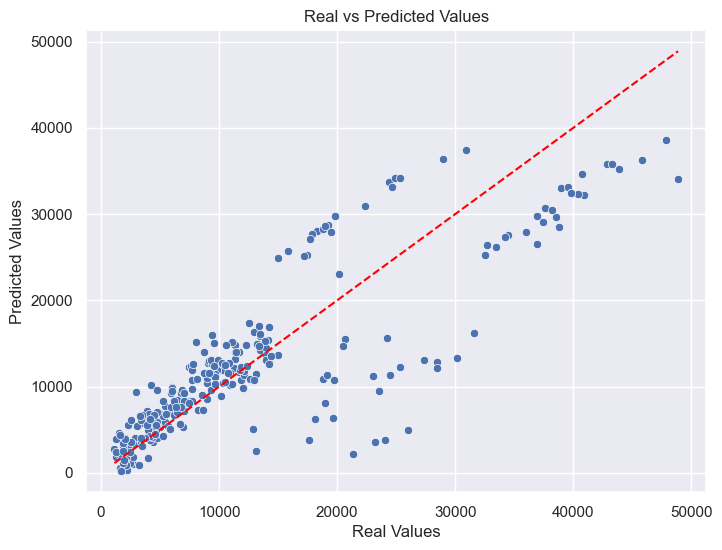

In [3072]:
predictions_df = pd.DataFrame({'Real Values': Y_test, 'Predicted Values': test_data_prediction})

# Plot real values vs predicted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Real Values', y='Predicted Values', data=predictions_df)

# Add a diagonal line for reference (perfect predictions)
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], linestyle='--', color='red')

# Add labels and title
plt.xlabel('Real Values')
plt.ylabel('Predicted Values')
plt.title('Real vs Predicted Values')

# Show the plot
plt.show()

## Building a Predictive System using Linear Regression

In [3073]:
input_data = (31,1,25.74,0,1,0)

# Changing input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

#Reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

Linear_Regression_prediction = regressor.predict(input_data_reshaped)



c:\Users\nirasha\Anaconda\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [3074]:
print(Linear_Regression_prediction)

[3691.184537]


## Loading Descision Tree Regressor

In [3075]:
from sklearn.tree import DecisionTreeRegressor
Decision_Tree_regressor = DecisionTreeRegressor(random_state=2)
Decision_Tree_regressor

DecisionTreeRegressor(random_state=2)

In [3076]:
Decision_Tree_regressor.fit(X_train,Y_train)
Decision_Tree_regressor.score(X_train,Y_train)

0.9994758392260757

In [3077]:
# Prediction using Decision Tree Regressor
Decision_Tree_prediction = Decision_Tree_regressor.predict(X_test)

In [3078]:
# Printing the Decision Tree predictions
print("Decision Tree Predictions: \n", Decision_Tree_prediction )

Decision Tree Predictions: 
 [39725.51805 13063.883   10594.2257  34439.8559   7726.854    3206.49135
  7160.094    1842.519   19361.9988  11658.11505 37165.1638  13047.33235
  1607.5101  11534.87265  9964.06     2396.0959  36837.467   17748.5062
 13112.6048  11150.78     3443.064    8582.3023   3861.20965  4415.1588
  6940.90985 24476.47851 38711.       8516.829   12032.326    2699.56835
  5266.3656  17361.7661  10797.3362   9778.3472   1621.8827  14043.4767
  9910.35985 39725.51805 10436.096   16776.30405 24520.264   11735.87905
  1986.9334   2727.3951   3309.7926   9377.9047  39611.7577  11938.25595
 10982.5013  12981.3457   2196.4732  13616.3586  26392.26029 15019.76005
 15161.5344   1909.52745  6877.9801   7045.499   23082.95533 17043.3414
  3260.199   11848.141    3554.203   12981.3457   6082.405    7345.7266
  9748.9106   9377.9047   4518.82625  4992.3764  25081.76784 12982.8747
  9875.6804   2459.7201  37165.1638  19361.9988  14410.9321   4415.1588
 39983.42595 11856.4115  2639

In [3079]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [3080]:
# Assuming Decision_Tree_prediction the predicted values for decision tree
mse_tree = mean_squared_error(Y_test, Decision_Tree_prediction)
r2_tree = r2_score(Y_test, Decision_Tree_prediction)
mae_tree = mean_absolute_error(Y_test, Decision_Tree_prediction)

print("Decision Tree - Mean Squared Error:", mse_tree)
print("Decision Tree - R-squared:", r2_tree)
print("Decision Tree - Mean Absolute Error:", mae_tree)

Decision Tree - Mean Squared Error: 40404722.9472916
Decision Tree - R-squared: 0.6721183663580034
Decision Tree - Mean Absolute Error: 2942.159888496241


In [3081]:
# Performs repeated k-fold cross-validation on regression 
from sklearn.model_selection import cross_val_score # function is used for cross-validated performance evaluation
from sklearn.model_selection import RepeatedKFold #  Variation of k-fold cross-validation that repeats the process multiple times for robustness.
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(regressor, X_test, test_data_prediction, scoring='r2', cv=cv, n_jobs=-1, error_score='raise') # The array of scores obtained from cross-validation.

In [3082]:
print('r2: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

r2: 1.000 (0.000)


In [3083]:
# Performs repeated k-fold cross-validation on regression 
from sklearn.model_selection import cross_val_score # function is used for cross-validated performance evaluation
from sklearn.model_selection import RepeatedKFold #  Variation of k-fold cross-validation that repeats the process multiple times for robustness.
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores_1 = cross_val_score(regressor, X_test, test_data_prediction, scoring='r2', cv=cv, n_jobs=-1, error_score='raise') # The array of scores obtained from cross-validation.

In [3084]:
print('r2: %.3f (%.3f)' % (np.mean(n_scores_1), np.std(n_scores_1)))

r2: 1.000 (0.000)


R-squared of 1 means that your model accounts for approximately 100% of the variability in the target variable on average across different folds and repeats.

1.00 is indicative of a very strong regression model. It suggests that model is highly effective at capturing the patterns in the data, and its predictions align closely with the actual values.




### Prediction using the decision tree model

In [3085]:
#Doing prediction for same input_data = (31,1,25.74,0,1,0)  

# Make prediction using the decision tree model
Decision_Tree_output_prediction = Decision_Tree_regressor.predict(input_data_reshaped)


c:\Users\nirasha\Anaconda\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [3086]:
print(Decision_Tree_output_prediction)

[3756.6216]


### Comparing the two algorithms output (Linear Regression, Decision Tree)

In [3087]:
input_data_1 = (38,1,25.74,0,1,0)  # ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']



# Changing input_data to a numpy array
input_data_as_numpy_array_1 = np.asarray(input_data_1)

#Reshape the array
input_data_reshaped_1 = input_data_as_numpy_array_1.reshape(1,-1)

Linear_Regression_prediction_1 = regressor.predict(input_data_reshaped_1)
print("Linear Regression prediction: ", Linear_Regression_prediction_1)

Decision_Tree_prediction_1 = Decision_Tree_regressor.predict(input_data_reshaped_1)
print("Decision Tree prediction: ",Decision_Tree_prediction_1)


Linear Regression prediction:  [5512.7053514]
Decision Tree prediction:  [5397.6167]


c:\Users\nirasha\Anaconda\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\nirasha\Anaconda\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


Both algorithms are not giving same output 

#########################################################################################################

In [3088]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
standardized_data = scaler.fit_transform(X_train)


In [3089]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
standardized_data = scaler.fit_transform(X_test)


In [3090]:
import math
print(math.sqrt(mean_squared_error(Y_test,test_data_prediction))) # Mean square error
print(explained_variance_score(Y_test,test_data_prediction)) # Varience

5817.570602263895
0.7264620554049037


########################################################################################

MSE MAE R2 for both

In [3091]:
# Assuming Y_test and test_data_prediction are your true values and predicted values
mse = mean_squared_error(Y_test, test_data_prediction)
r2 = r2_score(Y_test, test_data_prediction)
mae = mean_absolute_error(Y_test, test_data_prediction)

print("Mean Squared Error:", mse)
print("R-squared:", r2)
print("Mean Absolute Error:", mae)


Mean Squared Error: 33844127.7123251
R-squared: 0.7253571594097672
Mean Absolute Error: 3976.4406988006


In [3096]:
# Assuming Decision_Tree_prediction is your predicted values for decision tree
mse_tree = mean_squared_error(Y_test, Decision_Tree_prediction)
r2_tree = r2_score(Y_test, Decision_Tree_prediction)
mae_tree = mean_absolute_error(Y_test, Decision_Tree_prediction)

print("Decision Tree - Mean Squared Error:", mse_tree)
print("Decision Tree - R-squared:", r2_tree)
print("Decision Tree - Mean Absolute Error:", mae_tree)


Decision Tree - Mean Squared Error: 40404722.9472916
Decision Tree - R-squared: 0.6721183663580034
Decision Tree - Mean Absolute Error: 2942.159888496241


Plots for Actual and Predicted Values

For Linear Regression

C:\Users\nirasha\AppData\Local\Temp\ipykernel_12572\1658267908.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(Y_test,hist=False,color='r',label='Actual Value')
c:\Users\nirasha\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\nirasha\Anaconda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead

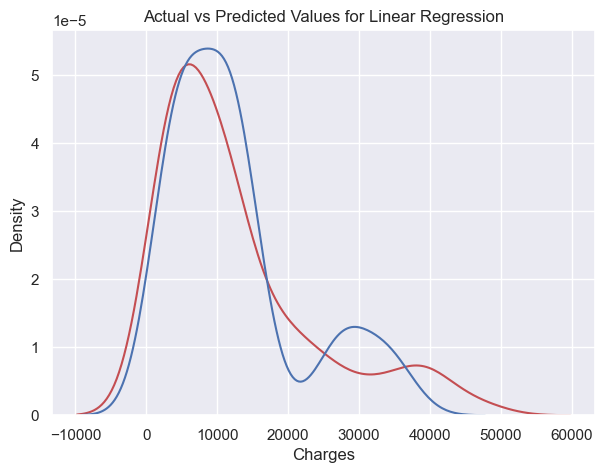

In [3093]:
plt.figure(figsize=(7,5))
ax1 = sns.distplot(Y_test,hist=False,color='r',label='Actual Value')
sns.distplot(test_data_prediction,hist=False,color='b',label='Predicted Value',ax=ax1)
plt.title('Actual vs Predicted Values for Linear Regression')
plt.xlabel('Charges')
plt.show()

For Decision Tree Regressor

C:\Users\nirasha\AppData\Local\Temp\ipykernel_12572\2558110088.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(Y_test, hist=False, color="r", label="Actual Value")
c:\Users\nirasha\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\nirasha\Anaconda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating inste

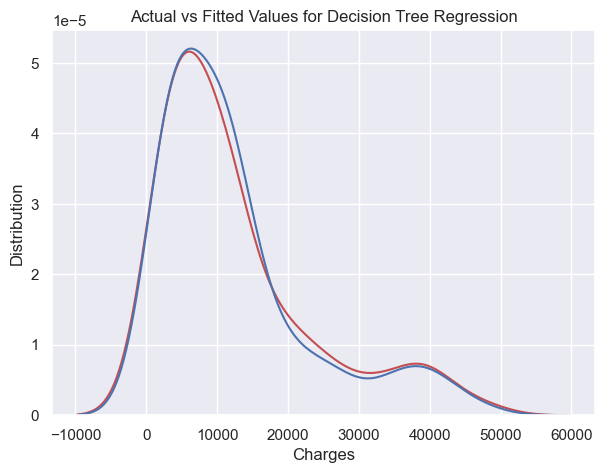

In [3094]:
#distribution plot of actual and predicted values
plt.figure(figsize=(7,5))
ax = sns.distplot(Y_test, hist=False, color="r", label="Actual Value")
sns.distplot(Decision_Tree_prediction, hist=False, color="b", label="Fitted Values" , ax=ax)
plt.title('Actual vs Fitted Values for Decision Tree Regression')
plt.xlabel('Charges')
plt.ylabel('Distribution')
plt.show()